In [92]:
import numpy as np
import pandas as pd
import string
import random
import keras
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.layers import Input,concatenate
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
from textattack.augmentation import WordNetAugmenter
from transformers import DistilBertTokenizer,TFDistilBertModel, TFBertModel,TFDistilBertForSequenceClassification,DistilBertModel,BertTokenizer, BertModel
from transformers import AdamWeightDecay
import torch
from transformers import BertTokenizer, TFBertForSequenceClassification, AdamWeightDecay
import tensorflow as tf
import time
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to C:\Users\Sharmi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sharmi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sharmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
df = pd.read_excel('train_edu.xlsx')
df.head()

,Education Level,Sanitation experience,Expected
0,Under Graduate,I've never had any serious issues in using work/ study place restroom.,1
1,Under Graduate,Bad,0
2,Under Graduate,Satisfied about the cleanliness of the study place.,1
3,Under Graduate,It should have more rest rooms not like 2 or 3 it should have tissue and sanitary napkins or it should atleast clean and odour free,0
4,Under Graduate,Set up a hygiene station with personalised cleaning products and supplies,0


In [94]:
test = pd.read_excel("test_edu.xlsx")
test

,Education Level,Sanitation experience,Expected
0,Under Graduate,Good,NaN
1,Under Graduate,Sometime it's good but not all the time...I feel awkward because of bad odour _x000D_\nI don't feel the restroom as my house restroom,NaN
2,Under Graduate,Girls don't have the basic knowledge in the disposal of used napkins. Therefore the college NSS Club should conduct an awareness program on how to dispose a used napkin,NaN
3,Doctorate,No separate rest rooms for women,NaN
4,Post Graduate,The rest rooms which I am using is very accessible and very clean. I never hesitate to use latrine in my office,NaN
...,...,...,...
68,Under Graduate,Maintenance should be neat,NaN
69,HSLC,"I hate the idea of western toilets. And moreover during work hours sometime the used pads are not disposed properly and odor get into the whole restroom which makes it difficult and disgusting to use restrooms in hostel/ work place. But when it comes to home, each and everyone there is self conscious about others using it and proper cleaning of toilets is done including the usage of restroom freshners or liquids.",NaN
70,Under Graduate,Restrooms are clean ans safe,NaN
71,Under Graduate,It is good clean,NaN


In [95]:
def clean_text(text):
    # lower text 
    text = text.lower()
    #removing stop words
    text = ' '.join([e_words for e_words in text.split(' ') if e_words not in stopwords.words('english')])
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n' , '', text)
    text = nltk.word_tokenize(text)
    #lemmatizer
    wn = nltk.WordNetLemmatizer()
    text = [wn.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

In [96]:
def textattack_data_augment(data, target, texattack_augmenter):
  aug_data = []
  aug_label = []
  for text, label in zip(data, target):
    if random.randint(0,2) != 1:
      aug_data.append(text)
      aug_label.append(label)
      continue
    aug_list = texattack_augmenter.augment(text)
    aug_data.append(text)
    aug_label.append(label)
    aug_data.extend(aug_list)
    aug_label.extend([label]*len(aug_list))

  return aug_data, aug_label

In [97]:
word_aug = WordNetAugmenter(pct_words_to_swap=0.2, transformations_per_example=3)
aug_data, aug_lable = textattack_data_augment(df["Sanitation experience"].apply(clean_text), df["Expected"], word_aug)
print(aug_data, aug_lable)
print(len(aug_data))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sharmi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['never serious issue using work study place restroom', 'bad', 'satisfied cleanliness study place', 'satisfied cleanliness study localize', 'satisfied cleanliness study shoes', 'satisfied cleanliness study site', 'rest room like 2 3 tissue sanitary napkin atleast clean odour free', 'set hygiene station personalised cleaning product supply', 'readiness hygiene station personalised cleaning product supply', 'rigid hygiene station personalised cleaning product supply', 'set hygiene station personalised cleaning product add', 'set hygiene station personalized cleaning product supply', 'satisfied due uncleanliness odour', 'feeling safeand satisfied cleanliness others', 'restroom good', 'worst', 'travel time faced lot struggle public toilet also much clean safe due reasonin recent time restricted using public toilet possible', 'quite good examination especially girl hard menstruation dayif start bleed mean invigilator dont allow washroom exam', 'keep clean', 'great', 'sanitation method reall

In [98]:
 import nltk
nltk.download('punkt', download_dir='C:\\Users\\Sharmi\\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\Sharmi\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
max_fatures = 1000
'''
using tokenizer from keras to convert text 
to their numeric form for embedding
'''
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(aug_data)
X = tokenizer.texts_to_sequences(aug_data)
X = pad_sequences(X)
X.shape


(732, 182)

In [100]:
#lstm implementation
embed_dim = 128
lstm_out = 196

lstm_model = Sequential()
lstm_model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
lstm_model.add(SpatialDropout1D(0.5))
lstm_model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))
lstm_model.add(Dense(2,activation='softmax'))
lstm_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


C:\Users\Sharmi\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [101]:
Y = pd.get_dummies(aug_lable).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 28)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(512, 182) (512, 2)
(220, 182) (220, 2)


In [102]:
#train lstm
batch_size = 6
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
start_time = time.time()
lstm_history =lstm_model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 2, validation_data = (X_test,Y_test) )
lstm_time = time.time() - start_time
print(lstm_model.summary())

Epoch 1/20
86/86 - 13s - 152ms/step - accuracy: 0.6211 - loss: 0.6666 - val_accuracy: 0.6364 - val_loss: 0.6584
Epoch 2/20
86/86 - 9s - 100ms/step - accuracy: 0.7051 - loss: 0.5967 - val_accuracy: 0.7364 - val_loss: 0.5402
Epoch 3/20
86/86 - 8s - 97ms/step - accuracy: 0.8145 - loss: 0.4621 - val_accuracy: 0.8136 - val_loss: 0.4373
Epoch 4/20
86/86 - 9s - 99ms/step - accuracy: 0.8418 - loss: 0.3556 - val_accuracy: 0.8318 - val_loss: 0.4016
Epoch 5/20
86/86 - 8s - 99ms/step - accuracy: 0.8887 - loss: 0.2812 - val_accuracy: 0.8455 - val_loss: 0.3669
Epoch 6/20
86/86 - 8s - 97ms/step - accuracy: 0.8984 - loss: 0.2700 - val_accuracy: 0.8364 - val_loss: 0.3814
Epoch 7/20
86/86 - 8s - 97ms/step - accuracy: 0.8906 - loss: 0.2634 - val_accuracy: 0.8455 - val_loss: 0.3522
Epoch 8/20
86/86 - 8s - 97ms/step - accuracy: 0.9219 - loss: 0.2073 - val_accuracy: 0.8591 - val_loss: 0.3462
Epoch 9/20
86/86 - 9s - 102ms/step - accuracy: 0.9414 - loss: 0.1591 - val_accuracy: 0.8591 - val_loss: 0.3414
Epoch 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)       │ (None, 182, 128)      │      128,000 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ spatial_dropout1d_1           │ (None, 182, 128)      │            0 │
│ (SpatialDropout1D)            │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_1 (LSTM)                 │ (None, 196)           │      254,800 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 2)             │          394 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 1,149,584 (4.39 MB)

 Trainable params: 383,194 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 766,390 (2.92 MB)

None


In [103]:
print(lstm_time)

176.41269755363464


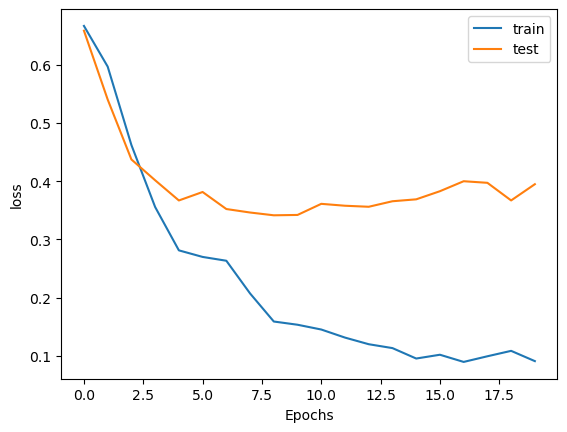

In [104]:
plt.plot(lstm_history.history['loss'],label='train')
plt.plot(lstm_history.history['val_loss'],label='test')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [105]:
score =lstm_model.evaluate(X_test, Y_test, verbose=2)

7/7 - 0s - 56ms/step - accuracy: 0.8636 - loss: 0.3948


In [106]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3948283791542053
Test Accuracy: 0.8636363744735718


In [107]:
temp  = lstm_model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


In [108]:
lstm_model.fit(X, Y, epochs = 5, batch_size=batch_size, verbose = 2)

Epoch 1/5
122/122 - 11s - 92ms/step - accuracy: 0.9358 - loss: 0.1707
Epoch 2/5
122/122 - 11s - 92ms/step - accuracy: 0.9413 - loss: 0.1663
Epoch 3/5
122/122 - 11s - 91ms/step - accuracy: 0.9631 - loss: 0.1262
Epoch 4/5
122/122 - 11s - 88ms/step - accuracy: 0.9495 - loss: 0.1278
Epoch 5/5
122/122 - 11s - 90ms/step - accuracy: 0.9699 - loss: 0.0991


In [109]:
# Predicting on the test set for LSTM
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm = y_pred_lstm.argmax(axis=1)  # Convert probabilities to class labels
y_true_lstm = Y_test.argmax(axis=1)  # Convert one-hot encoded labels to class labels
# Generating classification reports
print("LSTM Model Performance:")
print(classification_report(y_true_lstm, y_pred_lstm))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
LSTM Model Performance:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       123
           1       0.93      0.97      0.95        97

    accuracy                           0.95       220
   macro avg       0.95      0.96      0.95       220
weighted avg       0.96      0.95      0.95       220



In [110]:
#splitting data for distilbert and bert
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["Sanitation experience"], df["Expected"], test_size=0.3, random_state=42
)

In [111]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [112]:
# ---- DistilBERT Model Implementation ----
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

train_encodings = distilbert_tokenizer(list(train_texts
                                           ), truncation=True, padding=True, max_length=100, return_tensors="tf")
val_encodings = distilbert_tokenizer(list(val_texts), truncation=True, padding=True, max_length=100, return_tensors="tf")

train_inputs = {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']}
val_inputs = {'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask']}

# Load DistilBERT model for binary classification
distilbert_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Use AdamWeightDecay from transformers to avoid optimizer-related errors
optimizer = AdamWeightDecay(learning_rate=2e-5)

distilbert_model.compile(optimizer=optimizer,
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [113]:
#train distilBERT
start_time = time.time()
distilbert_history = distilbert_model.fit(train_inputs, train_labels, epochs=20, validation_data=(val_inputs, val_labels), batch_size=6)
distilbert_time = time.time() - start_time
print(distilbert_time)

Epoch 1/20
42/42 [==============================] - 46s 924ms/step - loss: 0.6193 - accuracy: 0.6825 - val_loss: 0.4444 - val_accuracy: 0.9259
Epoch 2/20
42/42 [==============================] - 39s 933ms/step - loss: 0.2632 - accuracy: 0.9286 - val_loss: 0.1959 - val_accuracy: 0.9259
Epoch 3/20
42/42 [==============================] - 38s 899ms/step - loss: 0.0761 - accuracy: 0.9881 - val_loss: 0.1552 - val_accuracy: 0.9352
Epoch 4/20
42/42 [==============================] - 37s 883ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.2326 - val_accuracy: 0.9259
Epoch 5/20
42/42 [==============================] - 37s 884ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.2865 - val_accuracy: 0.9074
Epoch 6/20
42/42 [==============================] - 35s 833ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.2879 - val_accuracy: 0.9259
Epoch 7/20
42/42 [==============================] - 36s 870ms/step - loss: 0.0295 - accuracy: 0.9881 - val_loss: 0.2911 - val_accuracy: 0.9259

In [114]:
print(distilbert_model.summary())

Model: "tf_distil_bert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_135 (Dropout)       multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [115]:
print(distilbert_time)

736.0168612003326


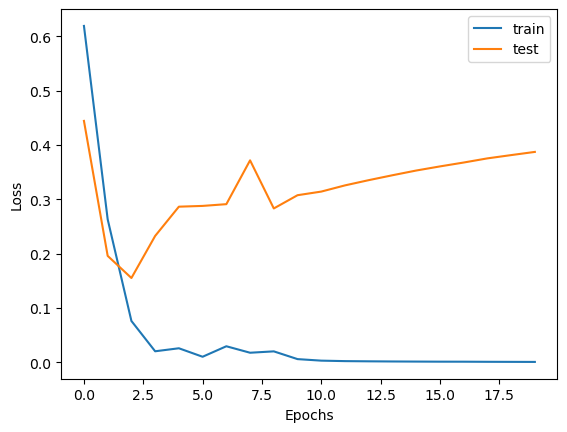

In [116]:
plt.plot(distilbert_history.history['loss'],label='train')
plt.plot(distilbert_history.history.get('val_loss',[]), label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [117]:
 score = distilbert_model.evaluate(val_inputs,val_labels, verbose=2)

4/4 - 6s - loss: 0.3873 - accuracy: 0.9259 - 6s/epoch - 1s/step


In [118]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.38733744621276855
Test Accuracy: 0.9259259104728699


In [119]:
temp  = distilbert_model.predict(val_inputs)

4/4 [==============================] - 5s 925ms/step


In [120]:
distilbert_model.fit(val_inputs, val_labels, epochs =5, batch_size=5, verbose = 2)

Epoch 1/5
22/22 - 22s - loss: 0.3170 - accuracy: 0.9259 - 22s/epoch - 1s/step
Epoch 2/5
22/22 - 18s - loss: 0.1422 - accuracy: 0.9259 - 18s/epoch - 818ms/step
Epoch 3/5
22/22 - 18s - loss: 0.0965 - accuracy: 0.9630 - 18s/epoch - 821ms/step
Epoch 4/5
22/22 - 17s - loss: 0.0113 - accuracy: 1.0000 - 17s/epoch - 791ms/step
Epoch 5/5
22/22 - 18s - loss: 0.0037 - accuracy: 1.0000 - 18s/epoch - 805ms/step


In [121]:
# Predicting on the test set for DistilBERT
y_pred_distilbert = distilbert_model.predict(val_inputs)
y_pred_distilbert = y_pred_distilbert.logits.argmax(axis=1)
y_true_distilbert = val_labels  # Already in correct format
# Generating classification reports
print("DistilBERT Model Performance:")
print(classification_report(y_true_distilbert, y_pred_distilbert))

4/4 [==============================] - 4s 950ms/step
DistilBERT Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        50

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



In [122]:

# ---- BERT Model Implementation ----
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = bert_tokenizer(list(train_texts), truncation=True, padding=True, max_length=100, return_tensors="tf")
val_encodings = bert_tokenizer(list(val_texts), truncation=True, padding=True, max_length=100, return_tensors="tf")

train_inputs = {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']}
val_inputs = {'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask']}

# Load BERT model for binary classification
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [123]:
# Use AdamWeightDecay optimizer
optimizer = AdamWeightDecay(learning_rate=2e-5)

bert_model.compile(optimizer=optimizer,
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

# Train BERT Model
start_time = time.time()
bert_history = bert_model.fit(train_inputs, train_labels, epochs=20, validation_data=(val_inputs, val_labels), batch_size=16)
bert_time = time.time() - start_time

Epoch 1/20
16/16 [==============================] - 78s 4s/step - loss: 0.6848 - accuracy: 0.6071 - val_loss: 0.5368 - val_accuracy: 0.7778
Epoch 2/20
16/16 [==============================] - 60s 4s/step - loss: 0.5341 - accuracy: 0.7738 - val_loss: 0.4526 - val_accuracy: 0.8056
Epoch 3/20
16/16 [==============================] - 61s 4s/step - loss: 0.3416 - accuracy: 0.8770 - val_loss: 0.3319 - val_accuracy: 0.8611
Epoch 4/20
16/16 [==============================] - 59s 4s/step - loss: 0.1732 - accuracy: 0.9484 - val_loss: 0.3590 - val_accuracy: 0.8704
Epoch 5/20
16/16 [==============================] - 60s 4s/step - loss: 0.1454 - accuracy: 0.9643 - val_loss: 0.2830 - val_accuracy: 0.8981
Epoch 6/20
16/16 [==============================] - 59s 4s/step - loss: 0.0555 - accuracy: 0.9881 - val_loss: 0.3579 - val_accuracy: 0.8704
Epoch 7/20
16/16 [==============================] - 59s 4s/step - loss: 0.0553 - accuracy: 0.9881 - val_loss: 0.3352 - val_accuracy: 0.8796
Epoch 8/20
16/16 [==

In [124]:
print(bert_time)

1210.7192809581757


In [125]:
print(bert_model.summary())

Model: "tf_bert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_173 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


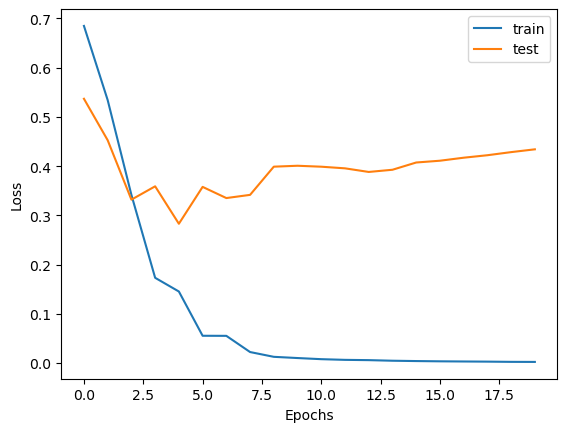

In [126]:
plt.plot(bert_history.history['loss'],label='train')
plt.plot(bert_history.history.get('val_loss',[]), label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [127]:
 score = bert_model.evaluate(val_inputs,val_labels, verbose=2)

4/4 - 9s - loss: 0.4341 - accuracy: 0.8981 - 9s/epoch - 2s/step


In [128]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.43413880467414856
Test Accuracy: 0.8981481194496155


In [129]:
temp  = bert_model.predict(val_inputs)

4/4 [==============================] - 12s 2s/step


In [130]:
bert_model.fit(val_inputs, val_labels, epochs =5, batch_size=5, verbose = 2)

Epoch 1/5
22/22 - 44s - loss: 0.3317 - accuracy: 0.8981 - 44s/epoch - 2s/step
Epoch 2/5
22/22 - 35s - loss: 0.1516 - accuracy: 0.9352 - 35s/epoch - 2s/step
Epoch 3/5
22/22 - 35s - loss: 0.0460 - accuracy: 0.9815 - 35s/epoch - 2s/step
Epoch 4/5
22/22 - 35s - loss: 0.0131 - accuracy: 1.0000 - 35s/epoch - 2s/step
Epoch 5/5
22/22 - 37s - loss: 0.0063 - accuracy: 1.0000 - 37s/epoch - 2s/step


In [131]:
# Predicting on the test set for BERT
y_pred_bert = bert_model.predict(val_inputs)
y_pred_bert = y_pred_bert.logits.argmax(axis=1)
y_true_bert = val_labels  # Already in correct format
# Generating classification reports
print("BERT Model Performance:")
print(classification_report(y_true_bert, y_pred_bert))

4/4 [==============================] - 9s 2s/step
BERT Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        50

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



In [132]:
#model comparison

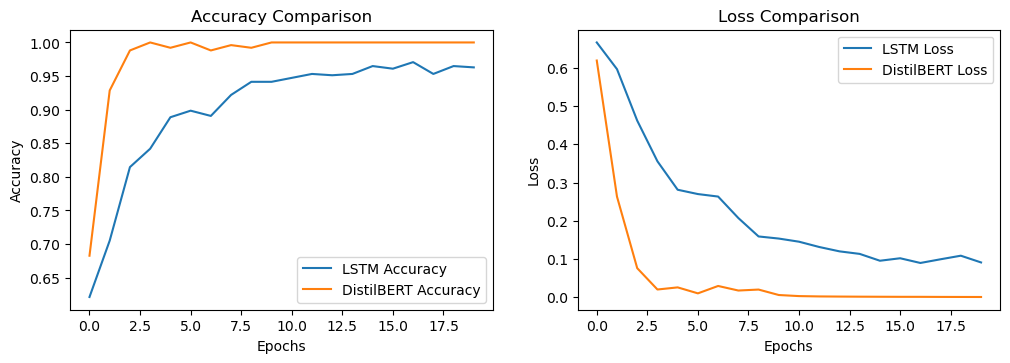

In [133]:
plt.figure(figsize=(12, 8))
# Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Accuracy')
plt.plot(distilbert_history.history['accuracy'], label='DistilBERT Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

# Loss Plot
plt.subplot(2, 2, 2)
plt.plot(lstm_history.history['loss'], label='LSTM Loss')
plt.plot(distilbert_history.history['loss'], label='DistilBERT Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

plt.show()

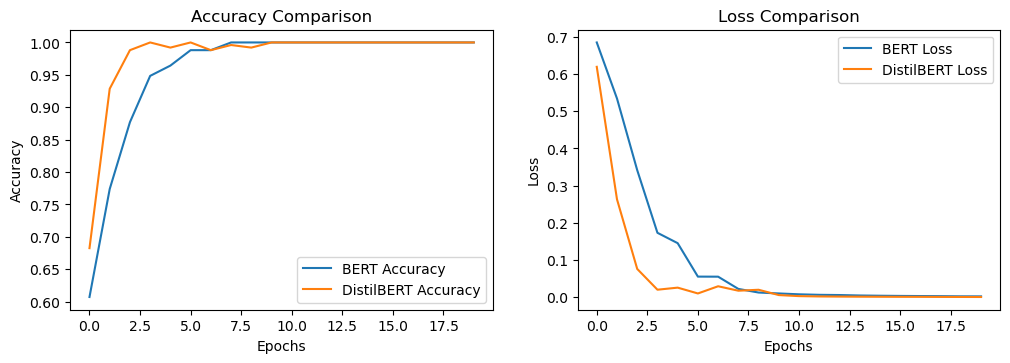

In [134]:
plt.figure(figsize=(12, 8))
# Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(bert_history.history['accuracy'], label='BERT Accuracy')
plt.plot(distilbert_history.history['accuracy'], label='DistilBERT Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

# Loss Plot
plt.subplot(2, 2, 2)
plt.plot(bert_history.history['loss'], label='BERT Loss')
plt.plot(distilbert_history.history['loss'], label='DistilBERT Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

plt.show()

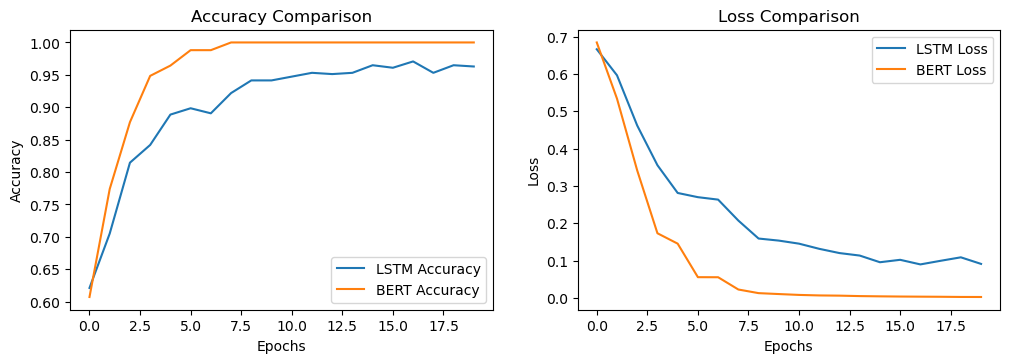

In [135]:
plt.figure(figsize=(12, 8))
# Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Accuracy')
plt.plot(bert_history.history['accuracy'], label='BERT Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

# Loss Plot
plt.subplot(2, 2, 2)
plt.plot(lstm_history.history['loss'], label='LSTM Loss')
plt.plot(bert_history.history['loss'], label='BERT Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

plt.show()

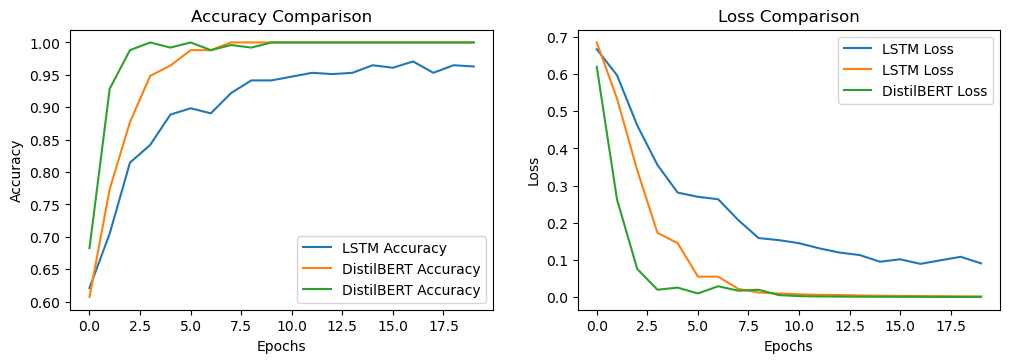

In [136]:
plt.figure(figsize=(12, 8))
# Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Accuracy')
plt.plot(bert_history.history['accuracy'], label='DistilBERT Accuracy')
plt.plot(distilbert_history.history['accuracy'], label='DistilBERT Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

# Loss Plot
plt.subplot(2, 2, 2)
plt.plot(lstm_history.history['loss'], label='LSTM Loss')
plt.plot(bert_history.history['loss'], label='LSTM Loss')
plt.plot(distilbert_history.history['loss'], label='DistilBERT Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

plt.show()

In [137]:
#text summarization with ratings

In [138]:
#using lstm
def get(a):
    twt = [a]
    twt = tokenizer.texts_to_sequences(twt)
    twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
    sentiment = lstm_model.predict(twt, batch_size=1, verbose=0)[0]
    return sentiment

In [139]:
test['Expected'] = test['Sanitation experience'].map(get)
test['positives'] = list(x[1] for x in test['Expected'])
Education=test['Education Level'].value_counts()
Education = list(Education.index)
groups = test.groupby(['Education Level'])
val = groups.get_group(Education[0])
negComments = list(val['Sanitation experience'][x] for x in val.index if np.argmax(val['Expected'][x]) == 0)



EducationDict = {}
for role in Education:
    val = groups.get_group(role)
    totalPositives = list(val['positives'][x] for x in val.index)
    negComments = list(val['Sanitation experience'][x] for x in val.index if np.argmax(val['Expected'][x]) == 0)
    score = sum(totalPositives)/len(totalPositives)
    EducationDict[role] =  (round(score*10),negComments)


soln = pd.DataFrame()
soln['Education'] = Education
soln['Rating'] = list(EducationDict[x][0] for x in Education)
soln['Negative Feedback'] = list(EducationDict[x][1] for x in Education)


pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
soln.shape

(4, 3)

In [140]:
def sentenceCase(sentences):
    words=sentences.split(". ")
    new=".".join([word.capitalize() for word in words])
    return new

In [141]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import language_tool_python    
my_tool = language_tool_python.LanguageTool('en-US')  

def clean_string(text, stem="None"):

    final_string = ""

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.strip()
    return text

In [142]:
text = soln['Negative Feedback'][1]

In [143]:
# input list of strings , output text
def getText(a):
  text = ""
  for word in a:
    text += my_tool.correct(clean_string(word).capitalize())
    if(text[-1]==' '):
      text = text[:-1]
    text += ". "
  return text

In [144]:
Soln = soln.drop(['Negative Feedback'],axis = 1)

In [145]:
from transformers import pipeline
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\Sharmi\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [146]:
Summary2 = []
for x in soln['Negative Feedback']:
    if x == []:
        Summary2.append("-")
        continue
    # text = x
    preprocess_text = getText(x)
    # preprocess_text = ". ".join([(str(item)) if str(item)[-1] != '.' else (str(item))[:-1] for item in text])
    if len(preprocess_text.split()) >= 30:
        summarized = summarizer(preprocess_text, min_length=10, max_length=30)
        Summary2.append(summarized[0]['summary_text'])
    else:
        Summary2.append(preprocess_text)

In [147]:
Soln['Summary'] = Summary2

In [148]:
soln

,Education,Rating,Negative Feedback
0,Under Graduate,5,"[Sometime it's good but not all the time...I feel awkward because of bad odour _x000D_\nI don't feel the restroom as my house restroom, Girls don't have the basic knowledge in the disposal of used napkins. Therefore the college NSS Club should conduct an awareness program on how to dispose a used napkin, Bad, Dissatisfied with the odor of the restrooms , There is no proper facilities to dispose used pads, Keep your campus clean , Less cleanliness, It's sometime very difficult to use the restroom but for urgent I use it but I don't like it, In my Office, the restrooms are not being cleaned regularly, which has led to an unpleasant and unhygienic environment. Additionally, there is no dustbin available, making it difficult to dispose of waste properly._x000D_\n_x000D_\nDue to these issues, I often avoid using the office restrooms, which is becoming increasingly inconvenient. , The smell OMG can't explain it such a bad one., No of restrooms should be increased and hand wash stations should be made available, It's not clean ,smells awful, used pads are everywhere,unsanitary,no buckets and cups ,, Some of them aren't keeping the rest rooms clean, Had worst experience by standing in a queue to access restrooms, The restroom is very far from my class, it is often crowded, and it smells really bad., Feeling annoyed about the inadequate restrooms and cleanliness , In study place the people did not wrap their sanitary pads. They freely put down in dustbin or above the dustbin. It gives very nasty smell in the restroom. So Please avoid that. , The saniatation facilities are adequate ,with basic cleanliness and accessibility maintained , though there's room for improvement in certain areas, Worst , Odor of the restrooms sucks, It is clean and good. , I naturally don't use washrooms other than the place where I stay and I don't know about any kind of reasons behind this and all I knew is I don't feel comfortable using toilets other than to which I have got habituated. , It is fine but still could be better, Can be more better, Disastified with odor]"
1,HSLC,4,"[Less number of restrooms with bad odor makes it irritating to use them, Hand wash and other toiletries must be provided. Very less number of restrooms., There is a very bad smell in our study place toilet..Not properly disposed napkins are just disgusting..The mugs and buckets there are damaged (cant even hold water)..Once in a while,I use toilet because of these drawbacks., Cleaning your hands after you use restrooms , I hate the idea of western toilets. And moreover during work hours sometime the used pads are not disposed properly and odor get into the whole restroom which makes it difficult and disgusting to use restrooms in hostel/ work place. But when it comes to home, each and everyone there is self conscious about others using it and proper cleaning of toilets is done including the usage of restroom freshners or liquids.]"
2,Post Graduate,2,"[Whenever I am using the toilet, I have to clean it by blowing good water., People using the restroom should keep it clean as it is our responsibility, Need more hygiene , It is clean and good ]"
3,Doctorate,3,"[No separate rest rooms for women , Sanitation maintenance is fine . But users should follow etiquette to keep it usable for others . ]"


In [149]:
#using DistilBERT
# Function to calculate sentiment
def get(text):
    inputs = distilbert_tokenizer(text, return_tensors="tf", truncation=True, padding=True)
    outputs = distilbert_model(inputs["input_ids"])
    scores = tf.nn.softmax(outputs.logits).numpy()[0]  # Convert to probabilities
    return scores  # Returns [neg, neu, pos] probabilities

In [150]:

# Apply DistilBERT sentiment prediction
test['Expected'] = test['Sanitation experience'].map(get)

# Determine correct indexing based on score length
first_sample = test['Expected'].iloc[0]  # Check first sample

if len(first_sample) == 3:
    test['positives'] = [x[2] for x in test['Expected']]  # Positive sentiment
elif len(first_sample) == 2:
    test['positives'] = [x[1] for x in test['Expected']]  # Use second value
else:
    raise ValueError("Unexpected number of sentiment values!")

In [151]:
# Group by Education
Education = test['Education Level'].value_counts().index.tolist()
groups = test.groupby(['Education Level'])

EduDict = {}
for role in Education:
    val = groups.get_group(role)
    
    totalPositives = [val['positives'][x] for x in val.index]
    negComments = [val['Sanitation experience'][x] for x in val.index if np.argmax(val['Expected'][x]) == 0]  # Negative sentiment

    # Calculate rating
    if len(totalPositives) > 0:
        score = sum(totalPositives) / len(totalPositives)
    else:
        score = 0  # Handle division by zero

    EduDict[role] = (round(score * 10), negComments)

In [152]:
# Create DataFrame for results
soln = pd.DataFrame()
soln['Education'] = Education
soln['Rating'] = [EduDict[x][0] for x in Education]
soln['Negative Feedback'] = [EduDict[x][1] for x in Education]
# Display DataFrame
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
soln

,Education,Rating,Negative Feedback
0,Under Graduate,6,"[Sometime it's good but not all the time...I feel awkward because of bad odour _x000D_\nI don't feel the restroom as my house restroom, Girls don't have the basic knowledge in the disposal of used napkins. Therefore the college NSS Club should conduct an awareness program on how to dispose a used napkin, Bad, Dissatisfied with the odor of the restrooms , There is no proper facilities to dispose used pads, Keep your campus clean , Less cleanliness, It's sometime very difficult to use the restroom but for urgent I use it but I don't like it, In my Office, the restrooms are not being cleaned regularly, which has led to an unpleasant and unhygienic environment. Additionally, there is no dustbin available, making it difficult to dispose of waste properly._x000D_\n_x000D_\nDue to these issues, I often avoid using the office restrooms, which is becoming increasingly inconvenient. , The smell OMG can't explain it such a bad one., No of restrooms should be increased and hand wash stations should be made available, It's not clean ,smells awful, used pads are everywhere,unsanitary,no buckets and cups ,, Some of them aren't keeping the rest rooms clean, Had worst experience by standing in a queue to access restrooms, The restroom is very far from my class, it is often crowded, and it smells really bad., Feeling annoyed about the inadequate restrooms and cleanliness , In study place the people did not wrap their sanitary pads. They freely put down in dustbin or above the dustbin. It gives very nasty smell in the restroom. So Please avoid that. , The saniatation facilities are adequate ,with basic cleanliness and accessibility maintained , though there's room for improvement in certain areas, Worst , Odor of the restrooms sucks, I naturally don't use washrooms other than the place where I stay and I don't know about any kind of reasons behind this and all I knew is I don't feel comfortable using toilets other than to which I have got habituated. , It is fine but still could be better, Can be more better, Disastified with odor, Maintenance should be neat]"
1,HSLC,5,"[Less number of restrooms with bad odor makes it irritating to use them, Hand wash and other toiletries must be provided. Very less number of restrooms., There is a very bad smell in our study place toilet..Not properly disposed napkins are just disgusting..The mugs and buckets there are damaged (cant even hold water)..Once in a while,I use toilet because of these drawbacks., I hate the idea of western toilets. And moreover during work hours sometime the used pads are not disposed properly and odor get into the whole restroom which makes it difficult and disgusting to use restrooms in hostel/ work place. But when it comes to home, each and everyone there is self conscious about others using it and proper cleaning of toilets is done including the usage of restroom freshners or liquids.]"
2,Post Graduate,4,"[Whenever I am using the toilet, I have to clean it by blowing good water., People using the restroom should keep it clean as it is our responsibility, Need more hygiene ]"
3,Doctorate,2,"[No separate rest rooms for women , Sanitation maintenance is fine . But users should follow etiquette to keep it usable for others . ]"


In [153]:
#using BERT
# Function to calculate sentiment
def get(text):
    inputs = bert_tokenizer(text, return_tensors="tf", truncation=True, padding=True)
    outputs = bert_model(inputs["input_ids"])
    scores = tf.nn.softmax(outputs.logits).numpy()[0]  # Convert to probabilities
    return scores  # Returns [neg, neu, pos] probabilities

In [154]:

# Apply BERT sentiment prediction
test['Expected'] = test['Sanitation experience'].map(get)

# Determine correct indexing based on score length
first_sample = test['Expected'].iloc[0]  # Check first sample

if len(first_sample) == 3:
    test['positives'] = [x[2] for x in test['Expected']]  # Positive sentiment
elif len(first_sample) == 2:
    test['positives'] = [x[1] for x in test['Expected']]  # Use second value
else:
    raise ValueError("Unexpected number of sentiment values!")

In [155]:
# Group by Employment
Education = test['Education Level'].value_counts().index.tolist()
groups = test.groupby(['Education Level'])

EduDict = {}
for role in Education:
    val = groups.get_group(role)
    
    totalPositives = [val['positives'][x] for x in val.index]
    negComments = [val['Sanitation experience'][x] for x in val.index if np.argmax(val['Expected'][x]) == 0]  # Negative sentiment

    # Calculate rating
    if len(totalPositives) > 0:
        score = sum(totalPositives) / len(totalPositives)
    else:
        score = 0  # Handle division by zero

    EduDict[role] = (round(score * 10), negComments)

In [156]:
# Create DataFrame for results
soln = pd.DataFrame()
soln['Employment'] = Education
soln['Rating'] = [EduDict[x][0] for x in Education]
soln['Negative Feedback'] = [EduDict[x][1] for x in Education]
# Display DataFrame
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
soln

,Employment,Rating,Negative Feedback
0,Under Graduate,6,"[Sometime it's good but not all the time...I feel awkward because of bad odour _x000D_\nI don't feel the restroom as my house restroom, Girls don't have the basic knowledge in the disposal of used napkins. Therefore the college NSS Club should conduct an awareness program on how to dispose a used napkin, Bad, Dissatisfied with the odor of the restrooms , There is no proper facilities to dispose used pads, Keep your campus clean , Less cleanliness, It's sometime very difficult to use the restroom but for urgent I use it but I don't like it, In my Office, the restrooms are not being cleaned regularly, which has led to an unpleasant and unhygienic environment. Additionally, there is no dustbin available, making it difficult to dispose of waste properly._x000D_\n_x000D_\nDue to these issues, I often avoid using the office restrooms, which is becoming increasingly inconvenient. , The smell OMG can't explain it such a bad one., No of restrooms should be increased and hand wash stations should be made available, It's not clean ,smells awful, used pads are everywhere,unsanitary,no buckets and cups ,, Some of them aren't keeping the rest rooms clean, Had worst experience by standing in a queue to access restrooms, The restroom is very far from my class, it is often crowded, and it smells really bad., Feeling annoyed about the inadequate restrooms and cleanliness , In study place the people did not wrap their sanitary pads. They freely put down in dustbin or above the dustbin. It gives very nasty smell in the restroom. So Please avoid that. , The saniatation facilities are adequate ,with basic cleanliness and accessibility maintained , though there's room for improvement in certain areas, Worst , Odor of the restrooms sucks, I naturally don't use washrooms other than the place where I stay and I don't know about any kind of reasons behind this and all I knew is I don't feel comfortable using toilets other than to which I have got habituated. , It is fine but still could be better, Can be more better, Maintenance should be neat]"
1,HSLC,5,"[Less number of restrooms with bad odor makes it irritating to use them, Hand wash and other toiletries must be provided. Very less number of restrooms., There is a very bad smell in our study place toilet..Not properly disposed napkins are just disgusting..The mugs and buckets there are damaged (cant even hold water)..Once in a while,I use toilet because of these drawbacks., I hate the idea of western toilets. And moreover during work hours sometime the used pads are not disposed properly and odor get into the whole restroom which makes it difficult and disgusting to use restrooms in hostel/ work place. But when it comes to home, each and everyone there is self conscious about others using it and proper cleaning of toilets is done including the usage of restroom freshners or liquids.]"
2,Post Graduate,4,"[Whenever I am using the toilet, I have to clean it by blowing good water., People using the restroom should keep it clean as it is our responsibility, Need more hygiene ]"
3,Doctorate,0,"[No separate rest rooms for women , Sanitation maintenance is fine . But users should follow etiquette to keep it usable for others . ]"
